## Random Forest Model 100 seeds
reference this site for help https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
Sam Zipper Code https://github.com/dry-rivers-rcn/IntermittencyTrends/blob/master/code/02_RandomForest_FigureOutNumPredictors.R

In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import statistics
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings

### Create RF Function ###

In [2]:
def rf_function(X, y, predict_col_name, test_size, seed_range, n_estimators):
    feature_list = list(X.columns) #take column names for plotting
    
    # standardize the dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Create seed range 
    seed_range = np.arange(0, seed_range, 1).tolist()
    importance_df_list = [] #list of dataframes
    error_list = []
    r2_list = []
    mae_list = []
    mse_list = []
    oob_error_list = []
    for i in range(len(seed_range)):
        # split into train and test set
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=seed_range[i])
        # model with n decision trees
        rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = 1, oob_score=True, random_state=seed_range[i]).fit(X_train, y_train)
        rf.fit(X_train, y_train);
        # Use the forest's predict method on the test data
        predictions = rf.predict(X_test)

        # Calculate error and r2 and store in list
        errors = abs(predictions - y_test) 
        error_list.append(errors)
        mae = mean_absolute_error(y_true=y_test, y_pred=predictions)
        mae_list.append(mae)
        mse = mean_squared_error(y_true=y_test, y_pred=predictions)
        mse_list.append(mse)

        # get obb error
        oob_error = 1- rf.oob_score_
        oob_error_list.append(oob_error)

        ##  Create Data Frame With Feature Importances
        importances = list(rf.feature_importances_) # Get numerical feature importances
        column_names = list(X.columns.values) #Get feature names
        RF_importances = pd.DataFrame(column_names, columns=['Features'])
        RF_importances['Importance'] = importances
        importance_df_list.append(RF_importances)

    ## Calculate Errors ##
    mean_abs_error = np.mean(mae_list)
    mean_sqr_error = np.mean(mse_list)
    mean_oob_error = np.mean(oob_error_list)
    display('mean absolute error = '+str(mean_abs_error))
    display('oob error = '+str(mean_oob_error))
    
    ## Take mean of all importances, then sort ##
    importance_sum = importance_df_list[0]['Importance'] #starting state
    for i in range(len(importance_df_list)-1): #start at zero, but add one so need to subract one
        importance_sum = importance_sum+importance_df_list[i+1]['Importance']

    importance_avg = importance_sum.div(len(importance_df_list))

    ## Create Dataframe ## 
    column_names = importance_df_list[0]['Features'] #get column names
    RF_importance_avg = pd.DataFrame(column_names, columns=['Features'])
    RF_importance_avg['Importance'] = importance_avg

    ## Order dataframe based on relative importance ##
    RF_importance_avg = RF_importance_avg.sort_values(by = 'Importance',ascending = False)

    ## Create list of ordered features ##
    feature_list_ordered = list(RF_importance_avg['Features']) #take column names for plotting

    ## Export ##
    RF_importance_avg.to_csv(r'./results/RF_results/variable_importance_all_variables_for_'+predict_col_name+' using '+str(len(seed_range))+' Seeds.csv', index = True)

    ### Plot Results ###
    # Import matplotlib for plotting and use magic command for Jupyter Notebooks

    %matplotlib inline
    # Set the style
    fig = plt.figure(figsize=(len(X)/3,5), facecolor='white') 
    plt.grid(False)
    # list of x locations for plotting
    x_values = list(range(len(RF_importance_avg['Importance'])))
    # Make a bar chart
    plt.bar(x_values, RF_importance_avg['Importance']*100, orientation = 'vertical')# label = 'Model accuracy = ' +str(round(accuracy, 2))+'%.')
    plt.tick_params(right=True, bottom=True)
    # Tick labels for x axis
    plt.xticks(x_values, feature_list_ordered, rotation=135, ha='left')
    plt.yticks(rotation=90, ha='right')
    # Axis labels and title
    #plt.ylabel('Importance (%)', size=20); #plt.title(predict_col_name + ' Average Variable Importances Using '+str(len(seed_range))+' Seeds' );
    #plt.title('Importances for '+predict_col_name, loc = 'right',y=1.1, pad=-14, size =20);
    plt.tick_params( colors='black', labelsize=15)
    plt.ylim((0,60))
    #plt.gca().set_xticklabels([])
    #plt.gca().set_yticklabels([])
    #plt.text(3, 10, 'Mean Absolute Error = ' +str(round(mean_abs_error, 2))+' days', fontsize = 15, bbox = dict(facecolor = 'white', alpha = 0.9))
    fig.savefig('./results/RF_results/Variable_Importances for_'+predict_col_name+' using '+str(len(seed_range))+' Seeds', dpi=300, bbox='tight')

# Load dataset
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1'], axis=1, inplace=False) 
#data = data.dropna(axis=0) #drop any row with NaN
data### No Flow Duration RF ###

'mean absolute error = 21.012368175757572'

'oob error = 0.6873043990518357'

C:\Users\thoma\AppData\Local\Temp\ipykernel_21520\2649220595.py:95: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('./results/RF_results/Variable_Importances for_'+predict_col_name+' using '+str(len(seed_range))+' Seeds', dpi=300, bbox='tight')


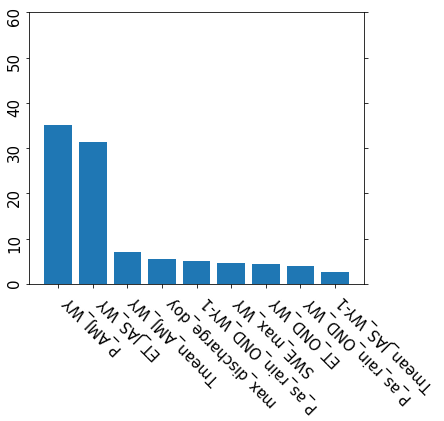

In [3]:
# Load dataset
#data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
#data = data.drop(['year.1'], axis=1, inplace=False) 
#data = data.dropna(axis=0) #drop any row with NaN
data

## Model inputs from user ## 
# split data into input and target variable(s)
X = data[['ET_JAS_WY','P_AMJ_WY', 'SWE_max_WY', 'Tmean_AMJ_WY', 'Tmean_JAS_WY-1', 'P_as_rain_OND_WY-1', 
          'P_as_rain_OND_WY', 'max_discharge_doy','ET_OND_WY']]
#display(X)
# Identify variable to predict
predict_col_name = 'days_no_flow_observed'
y = data[predict_col_name]

test_size = 0.25 # fraction of data to use for predicting model 
seed_range = 100 # number of seeds
n_estimators = 1000 # monte carlo number of runs, which is the number of trees created

rf_function(X, y, predict_col_name, test_size, seed_range, n_estimators)

### First Dry RF 

'mean absolute error = 12.918027906746065'

'oob error = 0.8414292716108058'

C:\Users\thoma\AppData\Local\Temp\ipykernel_21520\2649220595.py:95: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('./results/RF_results/Variable_Importances for_'+predict_col_name+' using '+str(len(seed_range))+' Seeds', dpi=300, bbox='tight')


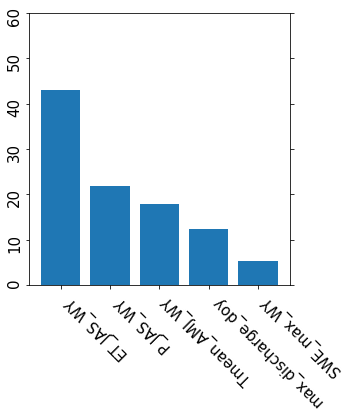

In [4]:
# Load dataset
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1'], axis=1, inplace=False) 
data = data.dropna(axis=0) #drop any row with NaN
data

## Model inputs from user ## 
# split data into input and target variable(s)
X = data[['ET_JAS_WY','Tmean_AMJ_WY', 'max_discharge_doy', 'P_JAS_WY', 'SWE_max_WY']]

# Identify variable to predict
predict_col_name = 'no_flow_start_date_doy'
y = data[predict_col_name]

test_size = 0.25 # fraction of data to use for predicting model 
seed_range = 100 # number of seeds
n_estimators = 1000 # monte carlo number of runs, which is the number of trees created

rf_function(X, y, predict_col_name, test_size, seed_range, n_estimators)

### Flow Returns RF

'mean absolute error = 7.797538867063511'

'oob error = 1.0586044933785859'

C:\Users\thoma\AppData\Local\Temp\ipykernel_21520\2649220595.py:95: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('./results/RF_results/Variable_Importances for_'+predict_col_name+' using '+str(len(seed_range))+' Seeds', dpi=300, bbox='tight')


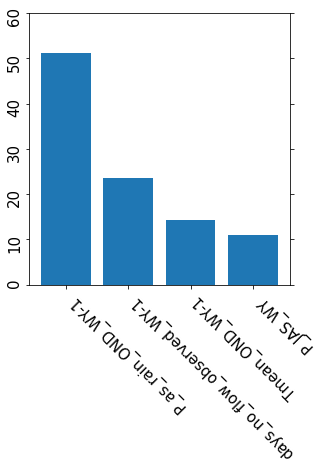

In [5]:
# Load dataset
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1'], axis=1, inplace=False) 
data = data.dropna(axis=0) #drop any row with NaN
data

## Model inputs from user ## 
# split data into input and target variable(s)
X = data[['P_as_rain_OND_WY-1', 'days_no_flow_observed_WY-1', 'P_JAS_WY', 'Tmean_OND_WY-1' ]]

# Identify variable to predict
predict_col_name = 'flow_returns_doy'
y = data[predict_col_name]

test_size = 0.25 # fraction of data to use for predicting model 
seed_range = 100 # number of seeds
n_estimators = 1000 # monte carlo number of runs, which is the number of trees created

rf_function(X, y, predict_col_name, test_size, seed_range, n_estimators)

### Peak Flow to Dry Duration RF 

,year,days_no_flow_observed,no_flow_start_date_doy,flow_returns_doy,peak_discharge_to_dry_duration_days,dry_binary,max_discharge_doy,SWE_max_WY,SWE_max_WY-1,peak_to_melt_duration,...,PET_JAS_WY,PET_OND_WY,PET_JFM_WY-1,PET_JAS_WY-1,PET_cum_WY-1,la_nina_WY,la_nina_WY-1,days_no_flow_observed_WY-1,temp_before_flow_returns,temp_after_flow_returns
0,2001,59.0,207.0,256.0,127.0,1.0,80.0,20.6,28.8,31,...,59.654675,14.476735,18.229206,58.868595,15746.2930,-0.400,-1.025,16.0,11.10,10.36
1,2002,39.0,207.0,260.0,103.0,1.0,104.0,27.8,20.6,53,...,57.038967,16.717836,17.667940,59.654675,13123.1300,0.250,-0.400,59.0,14.58,8.58
2,2004,14.0,224.0,230.0,141.0,1.0,83.0,28.7,22.9,65,...,54.491550,18.354887,15.883489,59.409607,13136.1180,0.375,0.450,16.0,18.72,13.78
3,2005,44.0,217.0,253.0,78.0,1.0,139.0,20.2,28.7,44,...,57.435380,14.458436,16.097878,54.491550,12804.1630,0.375,0.375,14.0,12.90,4.36
4,2007,76.0,188.0,261.0,117.0,1.0,71.0,21.7,33.9,58,...,57.869480,17.066435,13.527661,57.984640,12677.1530,-0.025,-0.300,0.0,11.82,8.22
5,2008,51.0,217.0,264.0,90.0,1.0,127.0,30.0,21.7,47,...,58.011383,15.943196,19.375078,57.869480,13374.2790,-1.000,-0.025,76.0,12.52,6.66
8,2012,21.0,221.0,243.0,129.0,1.0,92.0,22.1,31.7,39,...,58.276733,16.003061,13.182602,56.616974,11647.9390,-0.425,-1.000,0.0,13.78,11.24
9,2013,77.0,191.0,268.0,94.0,1.0,97.0,14.4,22.1,41,...,55.603090,16.231367,15.957176,58.276733,12881.9980,-0.250,-0.425,21.0,8.60,4.20
10,2014,77.0,195.0,270.0,149.0,1.0,46.0,25.4,14.4,47,...,55.823772,16.631186,16.482447,55.603090,12739.0380,-0.100,-0.250,77.0,13.38,6.12
11,2015,73.0,182.0,264.0,141.0,1.0,41.0,13.2,25.4,68,...,56.176815,17.557356,16.767515,55.823772,12921.7790,0.975,-0.100,77.0,4.44,10.98


'mean absolute error = 16.80373180654761'

'oob error = 0.8511098718052846'

C:\Users\thoma\AppData\Local\Temp\ipykernel_21520\2649220595.py:95: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('./results/RF_results/Variable_Importances for_'+predict_col_name+' using '+str(len(seed_range))+' Seeds', dpi=300, bbox='tight')


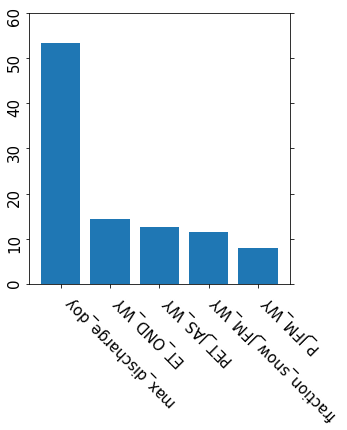

In [6]:
# Load dataset
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1'], axis=1, inplace=False) 
data = data.dropna(axis=0) #drop any row with NaN
display(data)

## Model inputs from user ## 
# split data into input and target variable(s)
X = data[['max_discharge_doy', 'ET_OND_WY', 'P_JFM_WY','fraction_snow_JFM_WY', 'PET_JAS_WY']]

# Identify variable to predict
predict_col_name = 'peak_discharge_to_dry_duration_days'
y = data[predict_col_name]

test_size = 0.25 # fraction of data to use for predicting model 
seed_range = 100 # number of seeds
n_estimators = 1000 # monte carlo number of runs, which is the number of trees created

rf_function(X, y, predict_col_name, test_size, seed_range, n_estimators)